### 1. Data cleaning and preparation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_employee=pd.read_csv('employee_survey_data.csv')
df_employee.head() # we can see relationship with 3 features.

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [30]:
df_employee['total_em'] = (df_employee['EnvironmentSatisfaction']+df_employee['JobSatisfaction']+df_employee['WorkLifeBalance'])/3

In [31]:
df_general = pd.read_csv('general_data.csv')
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [32]:
df_general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [33]:
df_manager=pd.read_csv('manager_survey_data.csv')
df_manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [34]:
df_manager['total_mn'] = (df_manager['JobInvolvement']+df_manager['PerformanceRating'])/2

In [35]:
df_manager.head()

,EmployeeID,JobInvolvement,PerformanceRating,total_mn
0,1,3,3,3.0
1,2,2,4,3.0
2,3,3,3,3.0
3,4,2,3,2.5
4,5,3,3,3.0


In [36]:
df_general['EmployeeID'].equals(df_manager['EmployeeID']) #we can do merge.

True

In [37]:
df_general['EmployeeID'].equals(df_employee['EmployeeID'])

True

In [38]:
df_general = df_general.merge(df_manager[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
df_general = df_general.merge(df_employee[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance','total_em']], on='EmployeeID')

In [39]:
# create a list of our conditions
conditions = [
    (df_general['Age'] <= 20),
    (df_general['Age'] > 20) & (df_general['Age'] <= 30),
    (df_general['Age'] > 30) & (df_general['Age'] <= 40),
    (df_general['Age'] > 40) & (df_general['Age'] <= 50),
    (df_general['Age'] > 50) & (df_general['Age'] <= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['less_20', '20_30', '30_40', '40_50', '50_60']

# create a new column and use np.select to assign values to it using our lists as arguments
df_general['Age_tier'] = np.select(conditions, values)

In [40]:
# about 2.5% data removed.
#(4410-4300)/4410
df_general.dropna(inplace=True)

In [41]:
df_general.shape

(4300, 32)

In [42]:
df_general.drop(columns=['EmployeeCount','Over18','StandardHours'], axis = 1, inplace = True)

In [43]:
df_general["Attrition"].replace({"Yes": 1, "No": 0}, inplace=True)

In [44]:
df_general.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4300.0,36.926977,9.146517,18.0,30.000000,36.000000,43.000000,60.0
Attrition,4300.0,0.161628,0.368152,0.0,0.000000,0.000000,0.000000,1.0
DistanceFromHome,4300.0,9.197907,8.097059,1.0,2.000000,7.000000,14.000000,29.0
Education,4300.0,2.913256,1.024774,1.0,2.000000,3.000000,4.000000,5.0
EmployeeID,4300.0,2211.695116,1272.117692,1.0,1110.750000,2215.500000,3314.250000,4409.0
JobLevel,4300.0,2.066977,1.106633,1.0,1.000000,2.000000,3.000000,5.0
MonthlyIncome,4300.0,65059.844186,47045.398914,10090.0,29260.000000,49360.000000,83802.500000,199990.0
NumCompaniesWorked,4300.0,2.690000,2.495764,0.0,1.000000,2.000000,4.000000,9.0
PercentSalaryHike,4300.0,15.210698,3.662777,11.0,12.000000,14.000000,18.000000,25.0
StockOptionLevel,4300.0,0.795349,0.853534,0.0,0.000000,1.000000,1.000000,3.0


In [45]:
# Conclusion
# 18-30 age people left company, --> damage of company(human resource) is big. 
df_general.groupby(['Age_tier']).mean()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,total_mn,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em
Age_tier,,,,,,,,,,,,,,,,,,,,,
20_30,26.940840,0.231870,9.098282,2.995229,2192.617366,2.062023,64795.629771,1.865458,15.332061,0.811069,...,4.720420,1.219466,3.128817,2.708015,3.158397,2.933206,2.720420,2.692748,2.707061,2.706743
30_40,35.225967,0.138122,9.377901,2.890608,2236.111050,2.064641,65844.182320,2.587293,15.128177,0.784530,...,6.971271,2.276243,4.362431,2.734807,3.148619,2.941713,2.724309,2.748619,2.787845,2.753591
40_50,44.994692,0.107219,9.010616,2.865180,2192.680467,1.990446,66594.798301,3.412951,15.128450,0.837580,...,8.989384,2.795117,4.817410,2.710191,3.157113,2.933652,2.701699,2.693206,2.806794,2.733900
50_60,54.638756,0.129187,9.411483,2.854067,2215.643541,2.229665,56089.473684,3.911483,15.148325,0.688995,...,9.825359,3.258373,4.820574,2.799043,3.133971,2.966507,2.763158,2.767943,2.629187,2.720096
less_20,19.134146,0.573171,7.560976,3.219512,2114.890244,2.231707,79217.560976,0.963415,16.743902,0.890244,...,0.878049,0.292683,0.512195,2.719512,3.280488,3.000000,2.817073,2.756098,3.012195,2.861789


### 2. data analysis _we look into Attrition is 'Yes = 1'

In [46]:
# Let's take a look at the age groups
df_left = df_general[df_general['Attrition']== 1]
df_left.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,total_mn,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,Age_tier
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,1,4,2,4,3.0,3.0,2.0,4.0,3.000000,30_40
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,7,Male,2,...,0,0,3,4,3.5,1.0,3.0,1.0,1.666667,20_30
13,47,1,Non-Travel,Research & Development,1,1,Medical,14,Male,1,...,9,9,2,3,2.5,1.0,2.0,2.0,1.666667,40_50
28,44,1,Travel_Frequently,Research & Development,1,2,Medical,29,Male,2,...,0,0,2,3,2.5,4.0,3.0,1.0,2.666667,40_50
30,26,1,Travel_Rarely,Research & Development,4,3,Medical,31,Male,3,...,0,2,2,3,2.5,1.0,2.0,3.0,2.000000,20_30


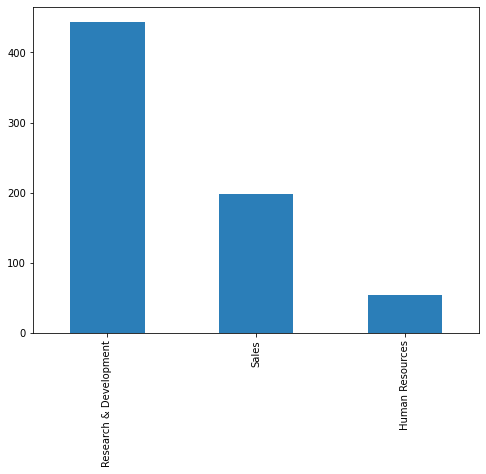

In [75]:
plt.figure(figsize=(8,6))
df_left.Department.value_counts().plot(kind='bar',alpha=.95)
plt.show()

Based on the age group Research and Development is the larget department.

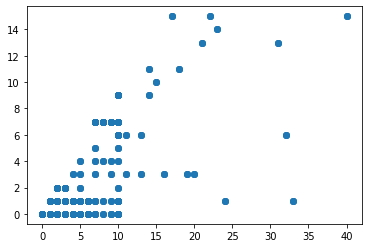

In [77]:
plt.scatter(df_left["YearsAtCompany"], df_left["YearsSinceLastPromotion"])

In [47]:
df_left[['JobInvolvement','PerformanceRating','total_mn','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','total_em']]

,JobInvolvement,PerformanceRating,total_mn,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em
1,2,4,3.0,3.0,2.0,4.0,3.000000
6,3,4,3.5,1.0,3.0,1.0,1.666667
13,2,3,2.5,1.0,2.0,2.0,1.666667
28,2,3,2.5,4.0,3.0,1.0,2.666667
30,2,3,2.5,1.0,2.0,3.0,2.000000
...,...,...,...,...,...,...,...
4381,3,4,3.5,3.0,4.0,2.0,3.000000
4386,2,4,3.0,3.0,4.0,1.0,2.666667
4388,3,3,3.0,1.0,1.0,4.0,2.000000
4391,3,3,3.0,4.0,3.0,1.0,2.666667


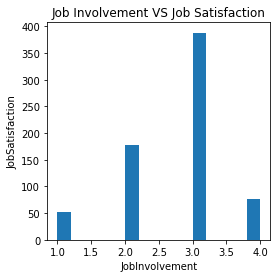

In [48]:
plt.figure(figsize=(4,4))
plt.hist(df_left.JobInvolvement	,bins=15)
plt.xlabel("JobInvolvement")
plt.ylabel("JobSatisfaction")
plt.title("Job Involvement VS Job Satisfaction")
plt.show()

It shows employee's job involvement leads to more job staisfaction.

In [49]:
filt = df_left[df_left['Age']<30]
filt.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,total_mn,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,Age_tier
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,7,Male,2,...,0,0,3,4,3.5,1.0,3.0,1.0,1.666667,20_30
30,26,1,Travel_Rarely,Research & Development,4,3,Medical,31,Male,3,...,0,2,2,3,2.5,1.0,2.0,3.0,2.000000,20_30
35,26,1,Travel_Rarely,Research & Development,8,3,Medical,36,Male,2,...,7,4,3,3,3.0,4.0,4.0,3.0,3.666667,20_30
38,18,1,Travel_Rarely,Research & Development,1,4,Life Sciences,39,Male,1,...,0,0,2,3,2.5,3.0,3.0,3.0,3.000000,less_20
65,28,1,Travel_Rarely,Research & Development,9,4,Medical,66,Male,1,...,2,2,2,3,2.5,1.0,4.0,2.0,2.333333,20_30


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


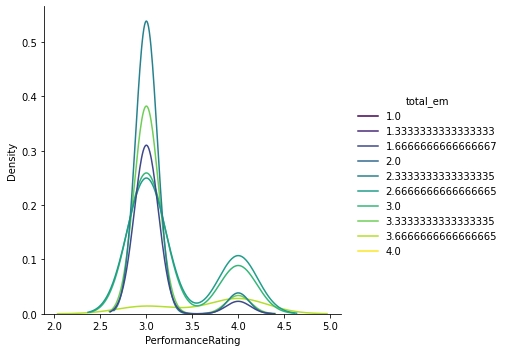

In [50]:
sns.displot(data = filt, x = 'PerformanceRating', hue = 'total_em', kind="kde",palette='viridis')

Age below 30 of employee, total employement years and performance rating 

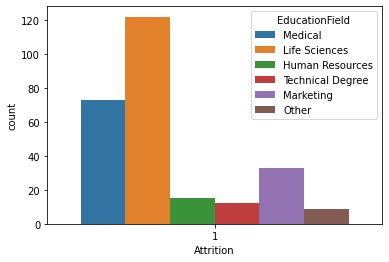

In [51]:
sns.countplot(x='Attrition', hue= 'EducationField', data = filt)
plt.show()

The relationship between attrition and education field age below 30 where life science on the top of the education field


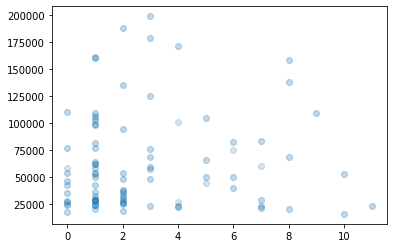

In [52]:
plt.scatter(filt["YearsAtCompany"], filt["MonthlyIncome"] , alpha=0.1)

It shows below 30 years old working at the same company and monthly income increase slightly. 

In [53]:
filt.shape

(264, 29)

### 2. data analysis_We look into people who are good performance but they was not satisfied at company.

In [54]:
keep_talent = filt[(filt['total_mn']-filt['total_em'])>1]

In [55]:
keep_talent.shape

(37, 29)

In [56]:
keep_talent

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,total_mn,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,Age_tier
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,7,Male,2,...,0,0,3,4,3.5,1.0,3.0,1.0,1.666667,20_30
78,29,1,Travel_Rarely,Research & Development,29,3,Medical,79,Female,1,...,0,7,3,3,3.0,2.0,1.0,2.0,1.666667,20_30
147,25,1,Travel_Rarely,Research & Development,5,2,Life Sciences,148,Female,3,...,0,2,3,3,3.0,1.0,1.0,3.0,1.666667,20_30
199,18,1,Travel_Frequently,Research & Development,2,3,Technical Degree,200,Male,1,...,0,0,4,3,3.5,2.0,2.0,3.0,2.333333,less_20
221,24,1,Travel_Frequently,Research & Development,2,3,Medical,222,Male,2,...,1,2,3,4,3.5,1.0,3.0,3.0,2.333333,20_30
331,29,1,Travel_Rarely,Sales,2,4,Marketing,332,Female,4,...,0,0,4,3,3.5,2.0,1.0,3.0,2.000000,20_30
431,20,1,Travel_Rarely,Research & Development,29,3,Life Sciences,432,Female,3,...,0,0,3,3,3.0,1.0,1.0,3.0,1.666667,less_20
504,26,1,Travel_Frequently,Sales,2,3,Life Sciences,505,Male,2,...,1,2,3,3,3.0,1.0,1.0,3.0,1.666667,20_30
539,26,1,Travel_Rarely,Sales,8,2,Marketing,540,Male,2,...,0,0,4,3,3.5,1.0,3.0,2.0,2.000000,20_30
657,21,1,Travel_Frequently,Research & Development,20,2,Medical,658,Female,4,...,2,2,3,3,3.0,1.0,3.0,1.0,1.666667,20_30


In [57]:
keep_talent.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37.0,24.810811,3.799399,18.0,21.000000,26.000000,29.0,29.000000
Attrition,37.0,1.000000,0.000000,1.0,1.000000,1.000000,1.0,1.000000
DistanceFromHome,37.0,10.621622,10.896868,1.0,2.000000,5.000000,20.0,29.000000
Education,37.0,2.702703,0.617561,2.0,2.000000,3.000000,3.0,4.000000
EmployeeID,37.0,1954.702703,1271.977089,7.0,658.000000,1975.000000,3140.0,3954.000000
JobLevel,37.0,2.729730,1.304877,1.0,2.000000,2.000000,4.0,5.000000
MonthlyIncome,37.0,52313.783784,29330.643092,23070.0,27910.000000,44340.000000,58130.0,109340.000000
NumCompaniesWorked,37.0,2.405405,2.101051,1.0,1.000000,1.000000,5.0,6.000000
PercentSalaryHike,37.0,15.216216,2.868751,11.0,13.000000,14.000000,17.0,21.000000
StockOptionLevel,37.0,1.027027,0.985633,0.0,0.000000,1.000000,2.0,3.000000


In [58]:
keep_talent.groupby(['BusinessTravel','Gender','MaritalStatus']).count()

Age  Attrition  Department  \
BusinessTravel    Gender MaritalStatus                               
Travel_Frequently Female Single           5          5           5   
                  Male   Married          6          6           6   
                         Single           3          3           3   
Travel_Rarely     Female Married          9          9           9   
                         Single           6          6           6   
                  Male   Divorced         3          3           3   
                         Single           5          5           5   

                                        DistanceFromHome  Education  \
BusinessTravel    Gender MaritalStatus                                
Travel_Frequently Female Single                        5          5   
                  Male   Married                       6          6   
                         Single                        3          3   
Travel_Rarely     Female Married                       9          9   
                         Single                        6          6   
                  Male   Divorced                      3          3   
                         Single                        5          5   

                                        EducationField  EmployeeID  JobLevel  \
BusinessTravel    Gender MaritalStatus                                         
Travel_Frequently Female Single                      5           5         5   
                  Male   Married                     6           6         6   
                         Single                      3           3         3   
Travel_Rarely     Female Married                     9           9         9   
                         Single                      6           6         6   
                  Male   Divorced                    3           3         3   
                         Single                      5           5         5   

                                        JobRole  MonthlyIncome  ...  \
BusinessTravel    Gender MaritalStatus                          ...   
Travel_Frequently Female Single               5              5  ...   
                  Male   Married              6              6  ...   
                         Single               3              3  ...   
Travel_Rarely     Female Married              9              9  ...   
                         Single               6              6  ...   
                  Male   Divorced             3              3  ...   
                         Single               5              5  ...   

                                        YearsSinceLastPromotion  \
BusinessTravel    Gender MaritalStatus                            
Travel_Frequently Female Single                               5   
                  Male   Married                              6   
                         Single                               3   
Travel_Rarely     Female Married                              9   
                         Single                               6   
                  Male   Divorced                             3   
                         Single                               5   

                                        YearsWithCurrManager  JobInvolvement  \
BusinessTravel    Gender MaritalStatus                                         
Travel_Frequently Female Single                            5               5   
                  Male   Married                           6               6   
                         Single                            3               3   
Travel_Rarely     Female Married                           9               9   
                         Single                            6               6   
                  Male   Divorced                          3               3   
                         Single                            5               5   

                                        PerformanceRating  total_mn  \
BusinessTrav

In [59]:
keep_talent['Department'].unique()

array(['Research & Development', 'Sales'], dtype=object)

### data analysis_ bonus

In [60]:
corr = df_general.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

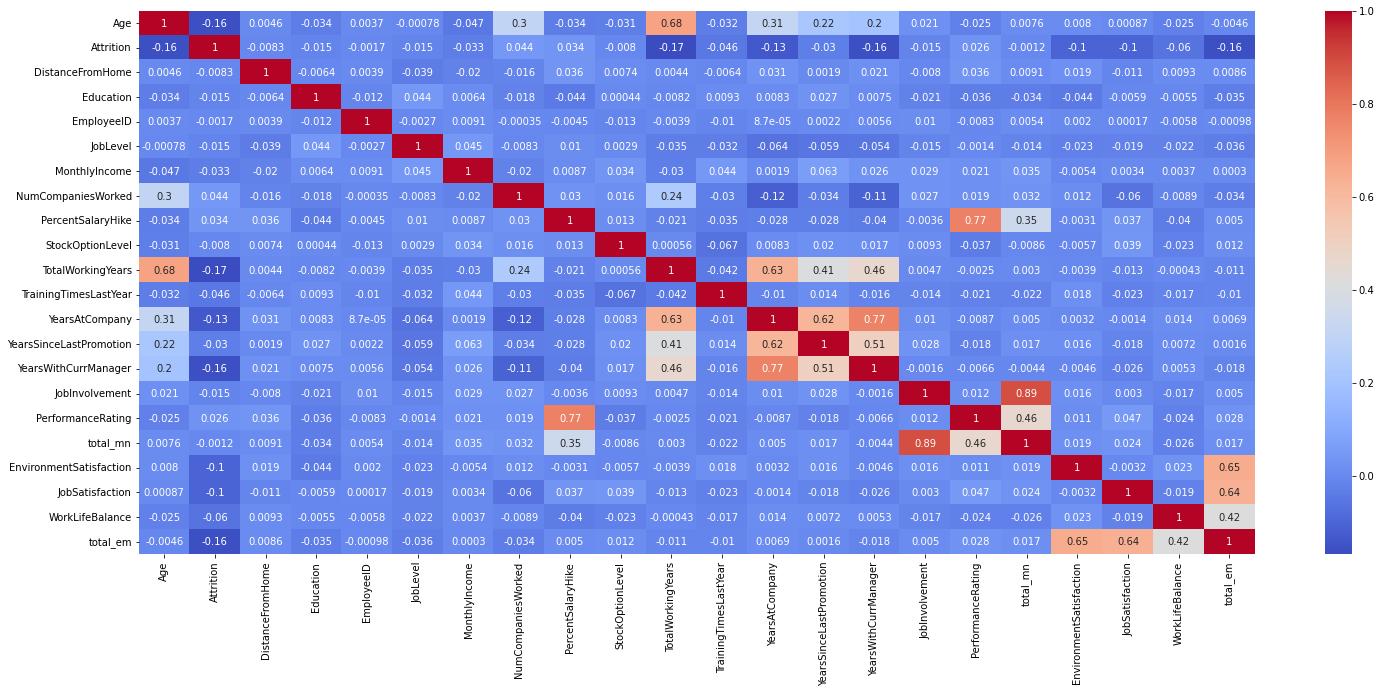

In [61]:
# Plotting correlation heatmap
import seaborn as sns # for Interactive plots
import itertools
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")
plt.xticks(rotation=90)

relationship of Attrition and (age,totalworkingyears, yearsatcompany, yearswithcurrentmanager) is big.
so we look into the age especially retirement age. 

In [62]:
# These people are about to retire in 10 years.
# 33/204 = about 16%, this is same with total retire rate.
df_general[(df_general['Age']>=55) & (df_general['Attrition']==1)]['Age'].count()

33

In [63]:
df_general[(df_general['Age']>=55) & (df_general['Attrition']==0)]['Age'].count()

171

#### Personal Data analysis

In [64]:
df_personal = df_general[['Age','DistanceFromHome','Gender','MaritalStatus','TotalWorkingYears','WorkLifeBalance','JobSatisfaction']]

In [65]:
df_personal.head()

,Age,DistanceFromHome,Gender,MaritalStatus,TotalWorkingYears,WorkLifeBalance,JobSatisfaction
0,51,6,Female,Married,1.0,2.0,4.0
1,31,10,Female,Single,6.0,4.0,2.0
2,32,17,Male,Married,5.0,1.0,2.0
3,38,2,Male,Married,13.0,3.0,4.0
4,32,10,Male,Single,9.0,3.0,1.0


In [66]:
df_job = df_general[['BusinessTravel','Department','JobLevel','JobRole','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 'YearsSinceLastPromotion']]

In [67]:
df_job.head()


,BusinessTravel,Department,JobLevel,JobRole,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
0,Travel_Rarely,Sales,1,Healthcare Representative,1.0,6,1,0
1,Travel_Frequently,Research & Development,1,Research Scientist,6.0,3,5,1
2,Travel_Frequently,Research & Development,4,Sales Executive,5.0,2,5,0
3,Non-Travel,Research & Development,3,Human Resources,13.0,5,8,7
4,Travel_Rarely,Research & Development,1,Sales Executive,9.0,2,6,0


#### relationship

In [68]:
df_relationship = df_general[['YearsWithCurrManager','YearsAtCompany','JobSatisfaction','Attrition']]

In [69]:
df_relationship.describe()

,YearsWithCurrManager,YearsAtCompany,JobSatisfaction,Attrition
count,4300.000000,4300.000000,4300.000000,4300.000000
mean,4.132558,7.026047,2.724884,0.161628
std,3.565831,6.148036,1.101875,0.368152
min,0.000000,0.000000,1.000000,0.000000
25%,2.000000,3.000000,2.000000,0.000000
50%,3.000000,5.000000,3.000000,0.000000
75%,7.000000,9.250000,4.000000,0.000000
max,17.000000,40.000000,4.000000,1.000000


In [72]:
import plotly.express as px
fig = px.bar(df_relationship, x='YearsWithCurrManager', y='Attrition')
fig.show()

Attrition is lower with many years with current managers

In [73]:
import plotly.express as px
fig = px.bar(df_relationship, x='JobSatisfaction', y='Attrition')
fig.show()

In [70]:
# salary
df_salary = df_general[['MonthlyIncome','StockOptionLevel','PercentSalaryHike','JobSatisfaction']]
df_salary.head()

,MonthlyIncome,StockOptionLevel,PercentSalaryHike,JobSatisfaction
0,131160,0,11,4.0
1,41890,1,23,2.0
2,193280,3,15,2.0
3,83210,3,11,4.0
4,23420,2,12,1.0


In [74]:
df_general['Department'].values

array(['Sales', 'Research & Development', 'Research & Development', ...,
       'Research & Development', 'Research & Development', 'Sales'],
      dtype=object)